# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [77]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from collections import Counter

## 1.1 Reading Data

In [78]:
project_data = pd.read_csv('train_data.csv',nrows=50000)
resource_data = pd.read_csv('resources.csv')

In [79]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (50000, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [80]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


## 1.2 preprocessing of `project_subject_categories`

In [81]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [82]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [83]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [84]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy,My students are English learners that are work...
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports,Our students arrive to our school eager to lea...


In [85]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [86]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [87]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [88]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [89]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [90]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [91]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [92]:
# Combining all the above stundents 
from tqdm import tqdm
import num2words
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub(r"(\d+)", lambda x: num2words.num2words(int(x.group(0))), sent)
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|███████████████████████████████████| 50000/50000 [01:24<00:00, 592.91it/s]


In [93]:
# after preprocesing
preprocessed_essays[20000]

'my kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism they eager beavers always strive work hardest working past limitations the materials ones i seek students i teach title i school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore have ever felt like ants pants needed groove move meeting this kids feel time the want able move learn say wobble chairs answer i love develop core enhances gross motor turn fine motor skills they also want learn games kids not want sit worksheets they want learn count jumping playing physical engagement key success the number toss color shape mats make happen my students forget work fun six year old deserves nannan'

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [94]:
# similarly you can preprocess the titles also
# Combining all the above statemennts 
#Replacing number with text https://stackoverflow.com/questions/40040177/search-and-replace-numbers-with-words-in-file
#re.sub(r"(\d+)", lambda x: num2words.num2words(int(x.group(0))), sent)
from tqdm import tqdm
preprocessed_title = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub(r"(\d+)", lambda x: num2words.num2words(int(x.group(0))), sent)
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_title.append(sent.lower().strip())

100%|█████████████████████████████████| 50000/50000 [00:03<00:00, 16060.49it/s]


In [95]:
#process project grade remove replace space with _ and replace - with _
preprocessed_grade = []
for sentance in  tqdm(project_data['project_grade_category'].values):
    sentance=sentance.replace(" ","_")
    sentance = sentance.replace("-","_")
    preprocessed_grade.append(sentance)
list(set(preprocessed_grade))

100%|████████████████████████████████| 50000/50000 [00:00<00:00, 675282.96it/s]


['Grades_PreK_2', 'Grades_3_5', 'Grades_6_8', 'Grades_9_12']

<h2><font color='red'> 1.4.1 Combining Resource data and project data`</font></h2>

In [96]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
print(project_data.columns)
project_data = pd.merge(project_data, price_data, on='id', how='left')
print(project_data.columns)

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay'],
      dtype='object')
Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price',
       'quantity'],
      dtype='object')


<h2><font color='red'>[1.4.2] Splitting data into Train and cross validation(or test): Stratified Sampling</font></h2>

In [97]:
# train test split
y_label= project_data['project_is_approved']
project_data['essay'] = preprocessed_essays
project_data['project_title']= preprocessed_title
project_data['project_grade_category']=preprocessed_grade
X_label = project_data.drop(columns='project_is_approved')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_label, y_label, test_size=0.33, stratify=y_label)

## 1.5 Preparing data for models

In [98]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price',
       'quantity'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [99]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
clean_categories_vectorizer = CountVectorizer()
clean_categories_vectorizer.fit(X_train['clean_categories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_categories_ohc = clean_categories_vectorizer.transform(X_train['clean_categories'].values)
#X_cv_categories_ohc = vectorizer.transform(X_cv['clean_categories'].values)
X_test_categories_ohc = clean_categories_vectorizer.transform(X_test['clean_categories'].values)

print("After vectorizations")
print(X_train_categories_ohc.shape, y_train.shape)
#print(X_cv_categories_ohc.shape, y_cv.shape)
print(X_test_categories_ohc.shape, y_test.shape)
print(clean_categories_vectorizer.get_feature_names())
print("="*100)

After vectorizations
(33500, 9) (33500,)
(16500, 9) (16500,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


In [100]:
# we use count vectorizer to convert the values into one 
clean_subcategories_vectorizer = CountVectorizer()
clean_subcategories_vectorizer.fit(X_train['clean_subcategories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_sub_categories_ohc = clean_subcategories_vectorizer.transform(X_train['clean_subcategories'].values)
#X_cv_sub_categories_ohc = vectorizer.transform(X_cv['clean_subcategories'].values)
X_test_sub_categories_ohc = clean_subcategories_vectorizer.transform(X_test['clean_subcategories'].values)

print("After vectorizations")
print(X_train_sub_categories_ohc.shape, y_train.shape)
#print(X_cv_sub_categories_ohc.shape, y_cv.shape)
print(X_test_sub_categories_ohc.shape, y_test.shape)
print(clean_subcategories_vectorizer.get_feature_names())
print("="*100)

After vectorizations
(33500, 30) (33500,)
(16500, 30) (16500,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


In [101]:
# you can do the similar thing with state, teacher_prefix and project_grade_category also
# we use count vectorizer to convert the values into one 
school_state_vectorizer = CountVectorizer()
school_state_vectorizer.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = school_state_vectorizer.transform(X_train['school_state'].values)
#X_cv_state_ohe = vectorizer.transform(X_cv['school_state'].values)
X_test_state_ohe = school_state_vectorizer.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
#print(X_cv_state_ohe.shape, y_cv.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(school_state_vectorizer.get_feature_names())
print("="*100)

After vectorizations
(33500, 51) (33500,)
(16500, 51) (16500,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


In [102]:
teacher_prefix_vectorizer = CountVectorizer()
teacher_prefix_vectorizer.fit(X_train['teacher_prefix'].values.astype('U')) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_ohe = teacher_prefix_vectorizer.transform(X_train['teacher_prefix'].values.astype('U'))
#X_cv_teacher_ohe = vectorizer.transform(X_cv['teacher_prefix'].values.astype('U'))
X_test_teacher_ohe = teacher_prefix_vectorizer.transform(X_test['teacher_prefix'].values.astype('U'))

print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
#print(X_cv_teacher_ohe.shape, y_cv.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
print(teacher_prefix_vectorizer.get_feature_names())
print("="*100)

After vectorizations
(33500, 6) (33500,)
(16500, 6) (16500,)
['dr', 'mr', 'mrs', 'ms', 'nan', 'teacher']


In [103]:
project_grade_vectorizer = CountVectorizer()
project_grade_vectorizer.fit(X_train['project_grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_grade_ohe = project_grade_vectorizer.transform(X_train['project_grade_category'].values)
#X_cv_grade_ohe = vectorizer.transform(X_cv['project_grade_category'].values)
X_test_grade_ohe = project_grade_vectorizer.transform(X_test['project_grade_category'].values)

print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
#print(X_cv_grade_ohe.shape, y_cv.shape)
print(X_test_grade_ohe.shape, y_test.shape)
print(project_grade_vectorizer.get_feature_names())
print("="*100)

After vectorizations
(33500, 4) (33500,)
(16500, 4) (16500,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

In [104]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
#BoW
preprocessed_essays =X_train['essay'].astype('U')
count_vect_essay = CountVectorizer(min_df=5) #in scikit-learn
count_vect_essay.fit(preprocessed_essays)
print("some feature names ", count_vect_essay.get_feature_names()[:10])
print('='*50)

x_essay_bow1 = count_vect_essay.transform(preprocessed_essays.astype('U'))
#cv_essay_bow1 = count_vect.transform(X_cv['essay'].astype('U'))
essay_bow1 = count_vect_essay.transform(X_test['essay'].astype('U'))
print("the type of count vectorizer ",type(essay_bow1))
print("the shape of out text BOW vectorizer ",essay_bow1.get_shape())
print("the number of unique words ", essay_bow1.get_shape()[1])


#Normalization of BOW
from sklearn.preprocessing import Normalizer
w_normalized = Normalizer()

w_normalized.fit(x_essay_bow1)

x_essay_bow = w_normalized.transform(x_essay_bow1)
#cv_essay_bow = w_normalized.transform(cv_essay_bow1)
essay_bow = w_normalized.transform(essay_bow1)

some feature names  ['aa', 'aac', 'ab', 'aba', 'abandon', 'abandoned', 'abandonment', 'abc', 'abcmouse', 'abcs']
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (16500, 13899)
the number of unique words  13899


In [105]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it
preprocessed_title =X_train['project_title'].astype('U')
count_vect_title = CountVectorizer(min_df=5) #in scikit-learn
count_vect_title.fit(preprocessed_title)
print("some feature names ", count_vect_title.get_feature_names()[:10])
print('='*50)

x_title_bow1 = count_vect_title.transform(preprocessed_title)
#cv_title_bow1 = count_vect.transform(X_cv['project_title'].astype('U'))
title_bow1 = count_vect_title.transform(X_test['project_title'].astype('U'))
print("the type of count vectorizer ",type(title_bow1))
print("the shape of out title BOW vectorizer ",title_bow1.get_shape())
print("the number of unique words ", title_bow1.get_shape()[1])

#Normalization of BOW title
from sklearn.preprocessing import Normalizer
w_normalized = Normalizer()

w_normalized.fit(x_title_bow1)

x_title_bow = w_normalized.transform(x_title_bow1)
#cv_title_bow = w_normalized.transform(cv_title_bow1)
title_bow = w_normalized.transform(title_bow1)

some feature names  ['abc', 'abcs', 'able', 'aboard', 'about', 'above', 'abstract', 'academic', 'academics', 'academy']
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out title BOW vectorizer  (16500, 2667)
the number of unique words  2667


#### 1.5.2.2 TFIDF vectorizer

In [106]:
from sklearn.feature_extraction.text import TfidfVectorizer
preprocessed_essays =X_train['essay']
tfidf_essay = TfidfVectorizer(min_df=5)
tfidf_essay.fit_transform(preprocessed_essays.astype('U'))
print("Shape of matrix after one hot encodig ",tfidf_essay.get_feature_names()[:10])
print('='*50)

x_essay_tfidf1 = tfidf_essay.transform(preprocessed_essays.astype('U'))
#cv_essay_tfidf1= vectorizer.transform(X_cv['essay'].astype('U'))
essay_tfidf1 = tfidf_essay.transform(X_test['essay'].astype('U'))
print("the type of count vectorizer ",type(essay_tfidf1))
print("the shape of out text tfidf vectorizer ",essay_tfidf1.get_shape())
print("the number of unique words ", essay_tfidf1.get_shape()[1])


#Normalization of TfIdf
from sklearn.preprocessing import Normalizer
w_normalized = Normalizer()

w_normalized.fit(x_essay_tfidf1)

x_essay_tfidf = w_normalized.transform(x_essay_tfidf1)
#cv_essay_tfidf = w_normalized.transform(cv_essay_tfidf1)
essay_tfidf = w_normalized.transform(essay_tfidf1)

Shape of matrix after one hot encodig  ['aa', 'aac', 'ab', 'aba', 'abandon', 'abandoned', 'abandonment', 'abc', 'abcmouse', 'abcs']
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text tfidf vectorizer  (16500, 13899)
the number of unique words  13899


In [107]:
# Similarly you can vectorize for title also
from sklearn.feature_extraction.text import TfidfVectorizer
preprocessed_title =X_train['project_title'].astype('U')
tfidf_title = TfidfVectorizer(min_df=5)
tfidf_title.fit_transform(preprocessed_title)
print("some feature names ", tfidf_title.get_feature_names()[:10])
print('='*50)

x_title_tfidf1 = tfidf_title.transform(preprocessed_title)
#cv_title_tfidf1 = vectorizer.transform(X_cv['project_title'].astype('U'))
title_tfidf1 = tfidf_title.transform(X_test['project_title'].astype('U'))
print("the type of count vectorizer ",type(title_tfidf1))
print("the shape of out title tfidf vectorizer ",title_tfidf1.get_shape())
print("the number of unique words ", title_tfidf1.get_shape()[1])


#Normalization of TfIdf title
from sklearn.preprocessing import Normalizer
w_normalized = Normalizer()

w_normalized.fit(x_title_tfidf1)

x_title_tfidf = w_normalized.transform(x_title_tfidf1)
#cv_title_tfidf = w_normalized.transform(cv_title_tfidf1)
title_tfidf = w_normalized.transform(title_tfidf1)


some feature names  ['abc', 'abcs', 'able', 'aboard', 'about', 'above', 'abstract', 'academic', 'academics', 'academy']
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out title tfidf vectorizer  (16500, 2667)
the number of unique words  2667


### 1.5.3 Vectorizing Numerical features

In [122]:
#1) For normalizing numerical data, we have to use reshape(1,-1) instead of (-1,1). 
#2) Normalizer by default normalizes on each sample(row).StandardScaler standardises on each feature(column).
#3) If we use (-1,1) it means any number of rows and one column. So that makes normalizer on each row containing one column.This makes the value 1.
#4) If we use (-1, 1) then  all your prices are 1. It wont be useful at all.  
#5) Note: If the shape mismatch is the problem for not using (1,-1) you can reshape into (-1,1) again after normalization is done.
#6) see the below example given in the comments
'''
Ex:
After (-1,1) array is [[1],[2],[3]]
Using normalizer results in
[[1/1],[2/2],[3/3]] = [[1],[1],[1]]
If you use (1,-1) array is [1,2,3]
result is
[1/sqrt(14) , 2/sqrt(14) , 3/sqrt(14) ] = [0.26,0.52, 0.78]

'''
from sklearn.preprocessing import Normalizer
price_normalized = Normalizer()

price_normalized.fit(X_train['price'].values.reshape(1,-1))

train_price_standardized1 = price_normalized.transform(X_train['price'].values.reshape(1,-1))
#cv_price_standardized = price_scalar.transform(X_cv['price'].values.reshape(1,-1))
test_price_standardized1 = price_normalized.transform(X_test['price'].values.reshape(1,-1))

train_price_standardized = train_price_standardized1.T 
test_price_standardized=test_price_standardized1.T
print(train_price_standardized.shape)
print(train_price_standardized)


(33500, 1)
[[0.00103426]
 [0.00248351]
 [0.0045744 ]
 ...
 [0.00110554]
 [0.00153323]
 [0.0024735 ]]


In [118]:
from sklearn.preprocessing import Normalizer
quantity_normalized = Normalizer()

quantity_normalized.fit(X_train['quantity'].values.reshape(1,-1))

train_quantity_normalized = quantity_normalized.transform(X_train['quantity'].values.reshape(1,-1))
test_quantity_normalized = quantity_normalized.transform(X_test['quantity'].values.reshape(1,-1))


In [110]:
from sklearn.preprocessing import Normalizer
prev_proj_normalized = Normalizer()

prev_proj_normalized.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

train_prev_proj_normalized = quantity_normalized.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
test_prev_proj_normalized = quantity_normalized.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

### <font color='red'>1.5.4 Merging all the above features</font>

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors
- Merging numerical is giving conflicting size, so i havent used numerical verctor in creating the hstack

In [123]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
train_bow_norm = hstack((X_train_categories_ohc, X_train_sub_categories_ohc,X_train_state_ohe,X_train_teacher_ohe, X_train_grade_ohe,x_essay_bow,x_title_bow,train_price_standardized))
print(train_bow_norm.shape)

test_bow_norm = hstack((X_test_categories_ohc, X_test_sub_categories_ohc,X_test_state_ohe,X_test_teacher_ohe, X_test_grade_ohe,essay_bow,title_bow,test_price_standardized))
print(test_bow_norm.shape)


(33500, 16667)
(16500, 16667)


In [124]:
#Bow without normalization
train_bow = hstack((X_train_categories_ohc, X_train_sub_categories_ohc,X_train_state_ohe,X_train_teacher_ohe, X_train_grade_ohe,x_essay_bow1,x_title_bow1,train_price_standardized))
print(train_bow.shape)

test_bow = hstack((X_test_categories_ohc, X_test_sub_categories_ohc,X_test_state_ohe,X_test_teacher_ohe, X_test_grade_ohe,essay_bow1,title_bow1,test_price_standardized))
print(test_bow.shape)

(33500, 16667)
(16500, 16667)


In [125]:
train_tfidf_norm = hstack((X_train_categories_ohc, X_train_sub_categories_ohc,X_train_state_ohe,X_train_teacher_ohe, X_train_grade_ohe,x_essay_tfidf,x_title_tfidf,train_price_standardized))
print(train_tfidf_norm.shape)

test_tfidf_norm = hstack((X_test_categories_ohc, X_test_sub_categories_ohc,X_test_state_ohe,X_test_teacher_ohe, X_test_grade_ohe,essay_tfidf,title_tfidf,test_price_standardized))
print(test_tfidf_norm.shape)


(33500, 16667)
(16500, 16667)


In [126]:
train_tfidf = hstack((X_train_categories_ohc, X_train_sub_categories_ohc,X_train_state_ohe,X_train_teacher_ohe, X_train_grade_ohe,x_essay_tfidf1,x_title_tfidf1,train_price_standardized))
print(train_tfidf.shape)

test_tfidf = hstack((X_test_categories_ohc, X_test_sub_categories_ohc,X_test_state_ohe,X_test_teacher_ohe, X_test_grade_ohe,essay_tfidf1,title_tfidf1,test_price_standardized))
print(test_tfidf.shape)

(33500, 16667)
(16500, 16667)


# Assignment 4: Naive Bayes

<ol>
    <li><strong>Apply Multinomial NaiveBayes on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning(find best Alpha)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Consider a wide range of alpha values for hyperparameter tuning, start as low as 0.00001</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li>
        </ul>
    </li>
    <br>
    <li><strong>Feature importance</strong>
        <ul>
    <li>Find the top 10 features of positive class and top 10 features of negative class for both feature sets <font color='red'>Set 1</font> and <font color='red'>Set 2</font> using values of `feature_log_prob_` parameter of  <a href='https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html'>MultinomialNB</a> and print their corresponding feature names</li>
        </ul>
    </li>
    <br>
    <li><strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure. Here on X-axis you will have alpha values, since they have a wide range, just to represent those alpha values on the graph, apply log function on those alpha values.
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points. Please visualize your confusion matrices using <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heatmaps.
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h1>2. Naive Bayes </h1>

<h2>2.1 Appling NB() on different kind of featurization as mentioned in the instructions</h2>

<br>Apply Naive Bayes on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [127]:
from prettytable import PrettyTable
table = PrettyTable()
table.field_names = ["Vectorizer", "Hyper parameter", "AUC"]

In [128]:
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [129]:
#using gridsearchcv
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
#https://stackoverflow.com/questions/52580023/how-to-get-the-best-estimator-parameters-out-from-pipelined-gridsearch-and-cro
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
import math

#Alpha is the hyper parameter of Naive Bayes
def Train_data(X_tr,y_train,vectorizer):
    nb = MultinomialNB(class_prior =[0.5,0.5])
    #alpha = [10**i for i in range(-5,1)]
    alpha = [0.00001,0.0001,0.001,0.01,0.05,0.025,0.1,0.5,0.25,1,10,100]
    fit_prior= [True, False]
    
    parameters = dict(alpha=alpha,fit_prior =fit_prior)
    clf = GridSearchCV(nb, parameters, cv=3, scoring='roc_auc', return_train_score=True)
    clf.fit(X_tr, y_train)
    
    best_parameters = clf.best_params_
    print("The best parameters for using this model is", best_parameters)
    
    K =  clf.cv_results_['param_alpha']
   
    train_auc = clf.cv_results_['mean_train_score']
    train_auc_std = clf.cv_results_['std_train_score']
    cv_auc = clf.cv_results_['mean_test_score'] 
    cv_auc_std= clf.cv_results_['std_test_score'] 
    
    alpha_log=[]
    for k_val in K:
        alpha_log.append(math.log(k_val))
            

    plt.plot(alpha_log, train_auc, label='Train AUC')
    # this code is copied from here: https://stackoverflow.com/a/48803361/4084039
    # plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

    plt.plot(alpha_log, cv_auc, label='CV AUC')
    # this code is copied from here: https://stackoverflow.com/a/48803361/4084039
    # plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

    plt.scatter(alpha_log, train_auc, label='Train AUC points')
    plt.scatter(alpha_log, cv_auc, label='CV AUC points')

    plt.legend()
    plt.xlabel("hyperparameter : Alpha")
    plt.ylabel("AUC")
    plt.title("AUC on various alphas using %s on text features"%vectorizer)
    plt.grid()
    plt.show()
    
    results = pd.DataFrame.from_dict(clf.cv_results_)
    results = results.sort_values(['param_alpha'])

In [130]:
#Round off the predicted values to fix value error
#https://stackoverflow.com/questions/38015181/accuracy-score-valueerror-cant-handle-mix-of-binary-and-continuous-target
from mlxtend.plotting import plot_confusion_matrix
def draw_train_confusion_matrix(CM):
    fig, ax = plot_confusion_matrix(conf_mat= CM, colorbar=True,
                                   show_absolute=True,
                                   show_normed=True)
    plt.title("Train Confusion Matrix ")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()

def draw_test_confusion_matrix(CM):
    fig, ax = plot_confusion_matrix(conf_mat= CM, colorbar=True,
                                   show_absolute=True,
                                   show_normed=True)
    plt.title("Test Confusion Matrix ")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()
    

def Test_Data(X_train, y_train,X_test,y_test,best_alpha,fit_prior, vectorizer):
    clf = MultinomialNB(alpha=best_alpha, class_prior =[0.5,0.5], fit_prior=fit_prior)
    clf.fit(X_train, y_train)
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    X_train = X_train.tocsr()
    X_test = X_test.tocsr()
    y_train_pred = clf.predict_proba(X_train)[:,1]
    y_test_pred =  clf.predict_proba(X_test)[:,1]                  
    
    train_fpr, train_tpr, thresholds = roc_curve(y_train,y_train_pred)
    test_fpr, test_tpr, thresholds = roc_curve(y_test, y_test_pred)

    sns.set_style("whitegrid");
    plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
    plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
    plt.legend()
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("ROC Curve using %s on text features"%vectorizer)
    plt.show()

    print("="*100)
    
    from sklearn.metrics import confusion_matrix
    print("Train confusion matrix")
    
    y_train_pred_val = []
    for item in y_train_pred:
        y_train_pred_val.append(int(round(item)))
        
    y_test_pred_val = []
    for item in y_test_pred:
        y_test_pred_val.append(int(round(item)))
    
    print("="*100)
    from sklearn.metrics import confusion_matrix
    best_t = find_best_threshold(thresholds, train_fpr, train_tpr)
    
    print("Train confusion matrix")
    predicted_train=predict_with_best_t(y_train_pred_val, best_t)
    cm_train = confusion_matrix(y_train, predicted_train)
    print(cm_train)
    draw_train_confusion_matrix(cm_train)
    
    print("Test confusion matrix")
    predicted_test=predict_with_best_t(y_test_pred_val, best_t)
    cm_test = confusion_matrix(y_test, predicted_test)
    print(cm_test)
    draw_test_confusion_matrix(cm_test)

    table.add_row([vectorizer, best_alpha, str(auc(test_fpr, test_tpr))])
    
    print(clf.feature_log_prob_.shape)
    return clf.feature_log_prob_

In [131]:
import numpy as np
def findTopFeatures(log_prob,count_vect,type):   
    feature_prob = pd.DataFrame(log_prob, columns = count_vect)
    feature_prob_tr = feature_prob.T

    if(type=='positive'):
        print("Top 10 Positive Features:-\n",feature_prob_tr[1].sort_values(ascending = False)[0:10])
    else:
        print("Top 10 Negative Features:-\n",feature_prob_tr[0].sort_values(ascending = False)[0:10])
    

### 2.1.1 Applying Naive Bayes on BOW,<font color='red'> SET 1</font>

The best parameters for using this model is {'alpha': 0.25, 'fit_prior': True}


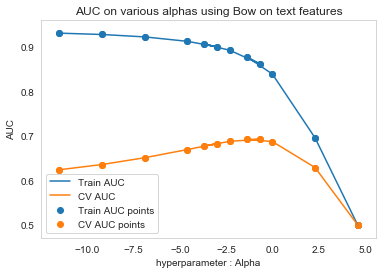

In [132]:
# Please write all the code with proper documentation
Train_data(train_bow,y_train,vectorizer="Bow")

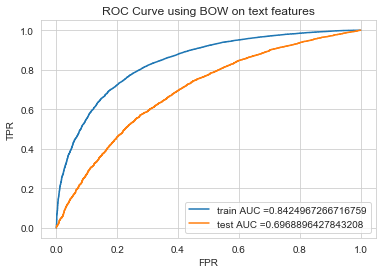

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.5862651640718259 for threshold 0.193
Train confusion matrix
[[ 3958  1210]
 [ 6697 21635]]


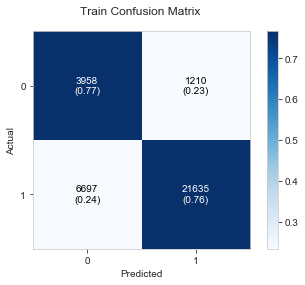

Test confusion matrix
[[ 1425  1121]
 [ 3749 10205]]


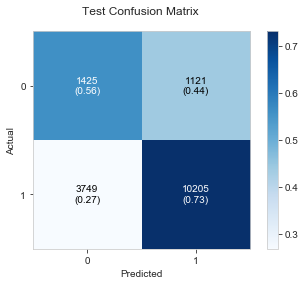

(2, 16667)


In [133]:
bow_result= Test_Data(train_bow,y_train,test_bow,y_test, best_alpha=0.25,fit_prior=True,vectorizer="BOW")

The best parameters for using this model is {'alpha': 0.1, 'fit_prior': True}


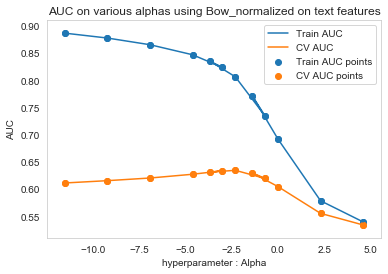

In [134]:
# Please write all the code with proper documentation
Train_data(train_bow_norm,y_train,vectorizer="Bow_normalized")

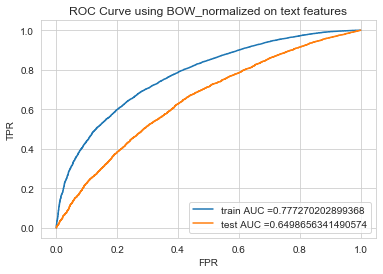

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.49762280745464327 for threshold 0.436
Train confusion matrix
[[ 3612  1556]
 [ 8309 20023]]


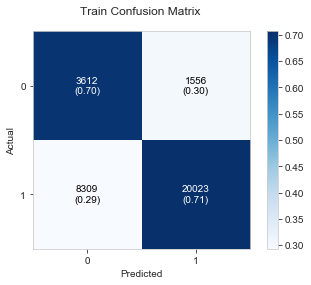

Test confusion matrix
[[1379 1167]
 [4406 9548]]


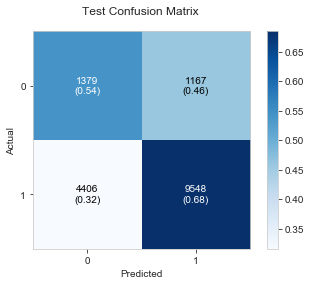

(2, 16667)


In [135]:
#Bow with normalization
bow_norm_result= Test_Data(train_bow_norm,y_train,test_bow_norm,y_test, best_alpha=0.1,fit_prior=True,vectorizer="BOW_normalized")

creating a list of all the text used in training of Bow

In [136]:
 bow_feature_list =[]

for i in clean_categories_vectorizer.get_feature_names():
    bow_feature_list.append(i)

for i in clean_subcategories_vectorizer.get_feature_names():
    bow_feature_list.append(i)

for i in school_state_vectorizer.get_feature_names():
    bow_feature_list.append(i)

for i in teacher_prefix_vectorizer.get_feature_names():
    bow_feature_list.append(i)

for i in project_grade_vectorizer.get_feature_names():
    bow_feature_list.append(i)

for i in count_vect_essay.get_feature_names():
    bow_feature_list.append(i)

for i in count_vect_title.get_feature_names():
    bow_feature_list.append(i)
    
bow_feature_list.append(price_normalized)

import numpy as np
myarray = np.asarray(bow_feature_list)
print(myarray.shape)

(16667,)


#### 2.1.1.1 Top 10 important features of positive class from<font color='red'> SET 1</font>

In [137]:
# Please write all the code with proper documentation
findTopFeatures(bow_result,myarray,'positive')

Top 10 Positive Features:-
 students    -3.078408
school      -4.219936
my          -4.537578
learning    -4.578796
classroom   -4.610132
the         -4.846593
they        -4.877090
not         -4.882598
learn       -4.925727
help        -4.956055
Name: 1, dtype: float64


In [138]:
# Please write all the code with proper documentation
findTopFeatures(bow_norm_result,myarray,'positive')

Top 10 Positive Features:-
 mrs                  -3.441597
literacy_language    -3.519953
students             -3.691261
grades_prek_2        -3.700853
math_science         -3.783796
ms                   -3.830369
grades_3_5           -3.870017
literacy             -3.940907
mathematics          -4.168144
literature_writing   -4.392429
Name: 1, dtype: float64


#### 2.1.1.2 Top 10 important features of negative class from<font color='red'> SET 1</font>

In [139]:
# Please write all the code with proper documentation
findTopFeatures(bow_result,myarray,'negative')

Top 10 Negative Features:-
 students    -3.097711
school      -4.209180
learning    -4.499472
my          -4.539424
classroom   -4.654540
learn       -4.859547
not         -4.868336
they        -4.877540
help        -4.878549
the         -4.919075
Name: 0, dtype: float64


In [140]:
findTopFeatures(bow_norm_result,myarray,'negative')

Top 10 Negative Features:-
 mrs                  -3.483845
literacy_language    -3.656285
grades_prek_2        -3.699849
students             -3.724433
math_science         -3.728194
ms                   -3.828580
grades_3_5           -3.923454
literacy             -4.142445
mathematics          -4.152077
literature_writing   -4.464102
Name: 0, dtype: float64


### 2.1.2 Applying Naive Bayes on TFIDF,<font color='red'> SET 2</font>

The best parameters for using this model is {'alpha': 0.1, 'fit_prior': True}


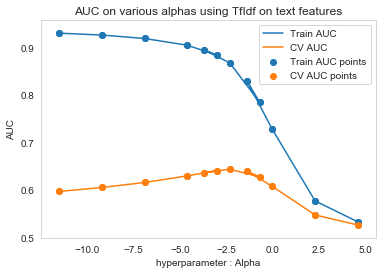

In [141]:
# Please write all the code with proper documentation
Train_data(train_tfidf,y_train,vectorizer="TfIdf")

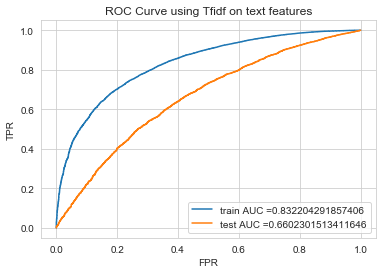

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.566007996078344 for threshold 0.479
Train confusion matrix
[[ 3932  1236]
 [ 7277 21055]]


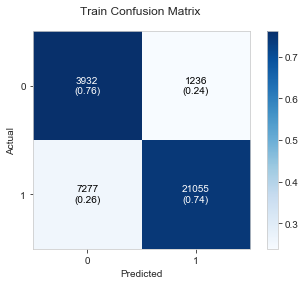

Test confusion matrix
[[1339 1207]
 [4079 9875]]


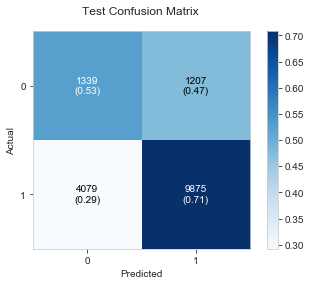

(2, 16667)


In [142]:
tfidf_result= Test_Data(train_tfidf,y_train,test_tfidf,y_test, best_alpha=0.1,fit_prior=True,vectorizer="Tfidf")

The best parameters for using this model is {'alpha': 0.1, 'fit_prior': True}


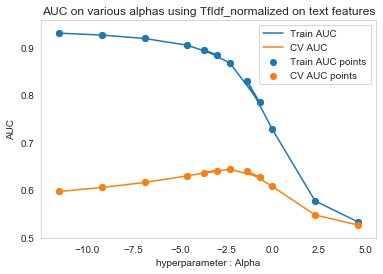

In [143]:
Train_data(train_tfidf_norm,y_train,vectorizer="TfIdf_normalized")

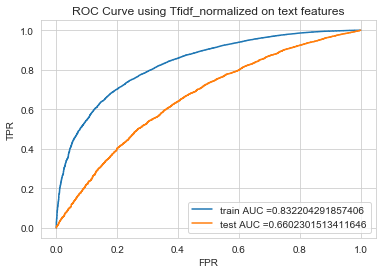

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.566007996078344 for threshold 0.479
Train confusion matrix
[[ 3932  1236]
 [ 7277 21055]]


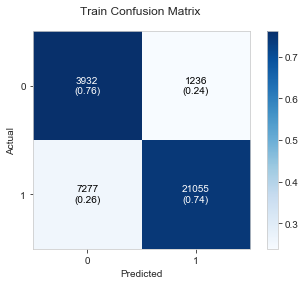

Test confusion matrix
[[1339 1207]
 [4079 9875]]


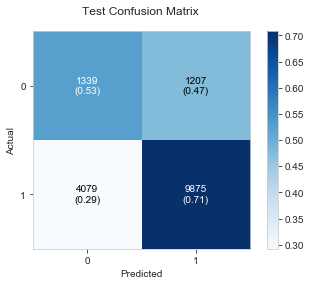

(2, 16667)


In [144]:
tfidf_norm_result= Test_Data(train_tfidf_norm,y_train,test_tfidf_norm,y_test, best_alpha=0.1,fit_prior=True,vectorizer="Tfidf_normalized")

creating a list of all the text used in training of Tfidf

In [145]:
tfidf_feature_list =[]

for i in clean_categories_vectorizer.get_feature_names():
    tfidf_feature_list.append(i)

for i in clean_subcategories_vectorizer.get_feature_names():
    tfidf_feature_list.append(i)

for i in school_state_vectorizer.get_feature_names():
    tfidf_feature_list.append(i)

for i in teacher_prefix_vectorizer.get_feature_names():
    tfidf_feature_list.append(i)

for i in project_grade_vectorizer.get_feature_names():
    tfidf_feature_list.append(i)

for i in tfidf_essay.get_feature_names():
    tfidf_feature_list.append(i)

for i in tfidf_title.get_feature_names():
    tfidf_feature_list.append(i)

tfidf_feature_list.append(price_normalized)
import numpy as np
tfidf_arry = np.asarray(tfidf_feature_list)
print(tfidf_arry.shape)

(16667,)


#### 2.1.2.1 Top 10 important features of positive class from<font color='red'> SET 2</font>

In [146]:
# Please write all the code with proper documentation
findTopFeatures(tfidf_result,tfidf_arry,'positive')

Top 10 Positive Features:-
 mrs                  -3.465239
literacy_language    -3.543595
grades_prek_2        -3.724495
math_science         -3.807438
ms                   -3.854011
grades_3_5           -3.893659
literacy             -3.964549
mathematics          -4.191786
literature_writing   -4.416071
grades_6_8           -4.706353
Name: 1, dtype: float64


In [147]:
findTopFeatures(tfidf_norm_result,tfidf_arry,'positive')

Top 10 Positive Features:-
 mrs                  -3.465239
literacy_language    -3.543595
grades_prek_2        -3.724495
math_science         -3.807438
ms                   -3.854011
grades_3_5           -3.893659
literacy             -3.964549
mathematics          -4.191786
literature_writing   -4.416071
grades_6_8           -4.706353
Name: 1, dtype: float64


#### 2.1.2.2 Top 10 important features of negative class from<font color='red'> SET 2</font>

In [148]:
# Please write all the code with proper documentation
findTopFeatures(tfidf_result,tfidf_arry,'negative')

Top 10 Negative Features:-
 mrs                  -3.507644
literacy_language    -3.680084
grades_prek_2        -3.723648
math_science         -3.751993
ms                   -3.852379
grades_3_5           -3.947253
literacy             -4.166244
mathematics          -4.175876
literature_writing   -4.487901
grades_6_8           -4.669186
Name: 0, dtype: float64


In [149]:
findTopFeatures(tfidf_norm_result,tfidf_arry,'negative')

Top 10 Negative Features:-
 mrs                  -3.507644
literacy_language    -3.680084
grades_prek_2        -3.723648
math_science         -3.751993
ms                   -3.852379
grades_3_5           -3.947253
literacy             -4.166244
mathematics          -4.175876
literature_writing   -4.487901
grades_6_8           -4.669186
Name: 0, dtype: float64


<h1>3. Conclusions</h1>

In [150]:
# Please compare all your models using Prettytable library
from prettytable import PrettyTable
print(table)

+------------------+-----------------+--------------------+
|    Vectorizer    | Hyper parameter |        AUC         |
+------------------+-----------------+--------------------+
|       BOW        |       0.25      | 0.6968896427843208 |
|  BOW_normalized  |       0.1       | 0.6498656341490574 |
|      Tfidf       |       0.1       | 0.6602301513411646 |
| Tfidf_normalized |       0.1       | 0.6602301513411646 |
+------------------+-----------------+--------------------+


1. The above results show, NaivaBayes is able to seperate positive and negative upto some extent but not very clearly. We should try other algorithms
2. To display the hyperparameters in plot clearly, I have taken log value of hyperparameter    
3. Theoritically,alpha value 1 will be overfitting,but Gridsearch provides 0.1 as best hyperparameter by using CV error   
4. Bow without normalized dataset is giving a better AUC value than normalized
5. The dataset  is imbalanced, we havnt used undersampling or oversampling, that may also have contributed for the conflicting specificity and sensitivity    
6. We can also conclude most of words used in title/essay of rejected projects looks almost same like approved project